In [1]:
import numpy as np
import pandas as pd
import string #special operations on strings


Text mining Assignment on Elon Musk tweets


In [2]:
import spacy #langauge models

In [3]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
tweet=pd.read_csv("D:\\Data Science-Ayesha\\Elon_musk (1).csv" , encoding='latin-1')

In [5]:
tweet.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
import re

In [7]:
tweet=[Text.strip() for Text in tweet.Text] # remove both the leading and the trailing characters
tweet=[Text for Text in tweet if Text] # removes empty strings, because they are considered in Python as False
tweet[0:10]


['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [8]:
tweet = ''.join(tweet)

In [121]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweet_tokens=tknzr.tokenize(tweet)
print(tweet_tokens)


['I', '\x92', 'm', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'It', '\x92', 's', 'getting', 'realBo

In [122]:
tweets_tokens_text=' '.join(tweet_tokens)

In [124]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))

In [125]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text


'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs freewalletorg Your app sucksRT  NASA has selected Falcon Hea

In [126]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)


['I', '\x92', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'tco3rWE9uHSTSgeoffkeighley', 'It', '\x92', 's', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'has', 'issues', 'but',

In [127]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Mohammed
[nltk_data]     Nouman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohammed
[nltk_data]     Nouman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)


['I', '\x92', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'tco3rWE9uHSTSgeoffkeighley', 'It', '\x92', 's', 'getting', 'realBought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'has', 'issues', 'but',

In [129]:
# Tokens count
len(text_tokens)


18275

In [130]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)


['alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'tco3rWE9uHSTSgeoffkeighley', 'It', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'freewalletorg', 'Your', 'app', 'sucksRT', 'NASA', 'sel

In [131]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])


['elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'blkmdl3', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', 'it', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas', 'apply', 'mars', 'cryptoshrikar', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', 'everyone', 'tesla', 'receives', 'stock', 'my', 'comp', 'stock', 'options', 'take', 'table', 'that', 'missingback', 'work', 'go', 'capybarasurfer', 'does', 'seem', 'bit', 'high', 'itsallrisky', 'doge', 'appears', 'inflationary', 'meaningfully', 'fixed', 'coins', 'per', 'unit', 'time', 'whereas', 'wow']


In [132]:
# Lemmatization
nlp=spacy.load('en_core_web_md')
doc=nlp(' '.join(lower_words))
print(doc)


alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocationthe entertaining outcome likely givedirectly just sent somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power any crypto wallet give private keys avoided costs freewalletorg your app sucksrt nasa selected falcon heavy launch first two elements lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lo

In [133]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'underdoge', 'all', 'think', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocationthe', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'somejust', 'agree', 'clubhouse', 'tco3rwe9uhstsgeoffkeighley', 'it', 'get', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', 'any', 'crypto', 'wallet', 'give', 'private', 'key', 'avoid', 'cost', 'freewalletorg', 'your', 'app', 'sucksrt', 'nasa', 'select', 'falcon', 'heavy',

In [134]:
clean_tweets=' '.join(lemmas)
clean_tweets


'alien idaacarmack ray trace cyberpunk hdr nextlevel have try great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox underdoge all think would fail himself haha thank indeed tweet definitely represent realworld time allocationthe entertaining outcome likely givedirectly just send somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it get realbought dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy this true power any crypto wallet give private key avoid cost freewalletorg your app sucksrt nasa select falcon heavy launch first two element lunar gateway together one mission blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon seque

In [135]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)


In [136]:
print(cv.vocabulary_)

{'alien': 219, 'idaacarmack': 1640, 'ray': 2684, 'trace': 3493, 'cyberpunk': 863, 'hdr': 1534, 'nextlevel': 2255, 'have': 1528, 'try': 3533, 'great': 1464, 'interview': 1750, 'gtera27': 1480, 'doge': 1004, 'underestimate': 3670, 'teslacn': 3358, 'congratulation': 763, 'tesla': 3356, 'china': 662, 'amazing': 241, 'execution': 1192, 'last': 1882, 'year': 3920, 'now': 2291, 'next': 2254, 'even': 1164, 'happy': 1513, 'new': 2252, 'ox': 2406, 'underdoge': 3669, 'all': 221, 'think': 3412, 'would': 3904, 'fail': 1226, 'himself': 1576, 'haha': 1492, 'thank': 3383, 'indeed': 1687, 'tweet': 3549, 'definitely': 912, 'represent': 2759, 'realworld': 2705, 'time': 3439, 'allocationthe': 224, 'entertaining': 1129, 'outcome': 2382, 'likely': 1936, 'givedirectly': 1431, 'just': 1820, 'send': 2931, 'somejust': 3078, 'agree': 196, 'clubhouse': 695, 'tco3rwe9uhstsgeoffkeighley': 3314, 'it': 1771, 'get': 1415, 'realbought': 2697, 'dogecoin': 1007, 'lil': 1940, 'toddler': 3456, 'hodler': 1585, 'joshmanmode'

In [137]:
print(cv.get_feature_names()[100:200])

['50000', '50k', '60', '60000', '65', '69420', '6f', '6ki', '727', '74', '78', '7th', '90', '9007', '91demigod', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absolutelyhey', 'absolutelywhat', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleratingrt', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'adamhoov', 'adamkiotz', 'adamklotz', 'add', 'additive', 'address', 'adlanbogatyryov', 'administer', 'adolfomoreno', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertise', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'age', 'ago

In [138]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [139]:
print(tweetscv.toarray().shape)

(11953, 3955)


In [140]:
#bigram and trigram

cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())


['actually', 'ai', 'also', 'back', 'big', 'booster', 'car', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'do', 'dragon', 'earth', 'engine', 'erdayastronaut', 'even', 'ever', 'exactly', 'falcon', 'first', 'flcnhvy', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'it', 'land', 'launch', 'like', 'look', 'lot', 'make', 'many', 'maybe', 'mission', 'model', 'much', 'need', 'new', 'next', 'no', 'not', 'one', 'part', 'people', 'point', 'ppathole', 'pretty', 'probably', 'production', 'right', 'rocket', 'say', 'seem', 'soon', 'space', 'spacex', 'starlink', 'starship', 'start', 'still', 'super', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'test', 'thank', 'that', 'the', 'there', 'they', 'think', 'this', 'time', 'true', 'try', 'ufe0f', 'use', 'way', 'we', 'week', 'well', 'will', 'work', 'would', 'yeah', 'year', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [141]:
#TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [142]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())


['10', '100', '13', '20', '2020', '30', '300', '40', '4d', '60', 'able', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'ago', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'and', 'appear', 'apply', 'appreciate', 'around', 'article', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'become', 'berlin', 'beta', 'big', 'bit', 'boca', 'body', 'booster', 'brain', 'bring', 'build', 'burn', 'but', 'cake', 'call', 'camera', 'can', 'car', 'cargo', 'catch', 'cell', 'ch4', 'change', 'china', 'civilization', 'cleantechnica', 'close', 'cold', 'color', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'datum', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'difference', 'different', 'dmcryan', 'do', 'dock', 'doge', 'dojo', 'dragon', 'drive', 'dronesh

In [143]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS


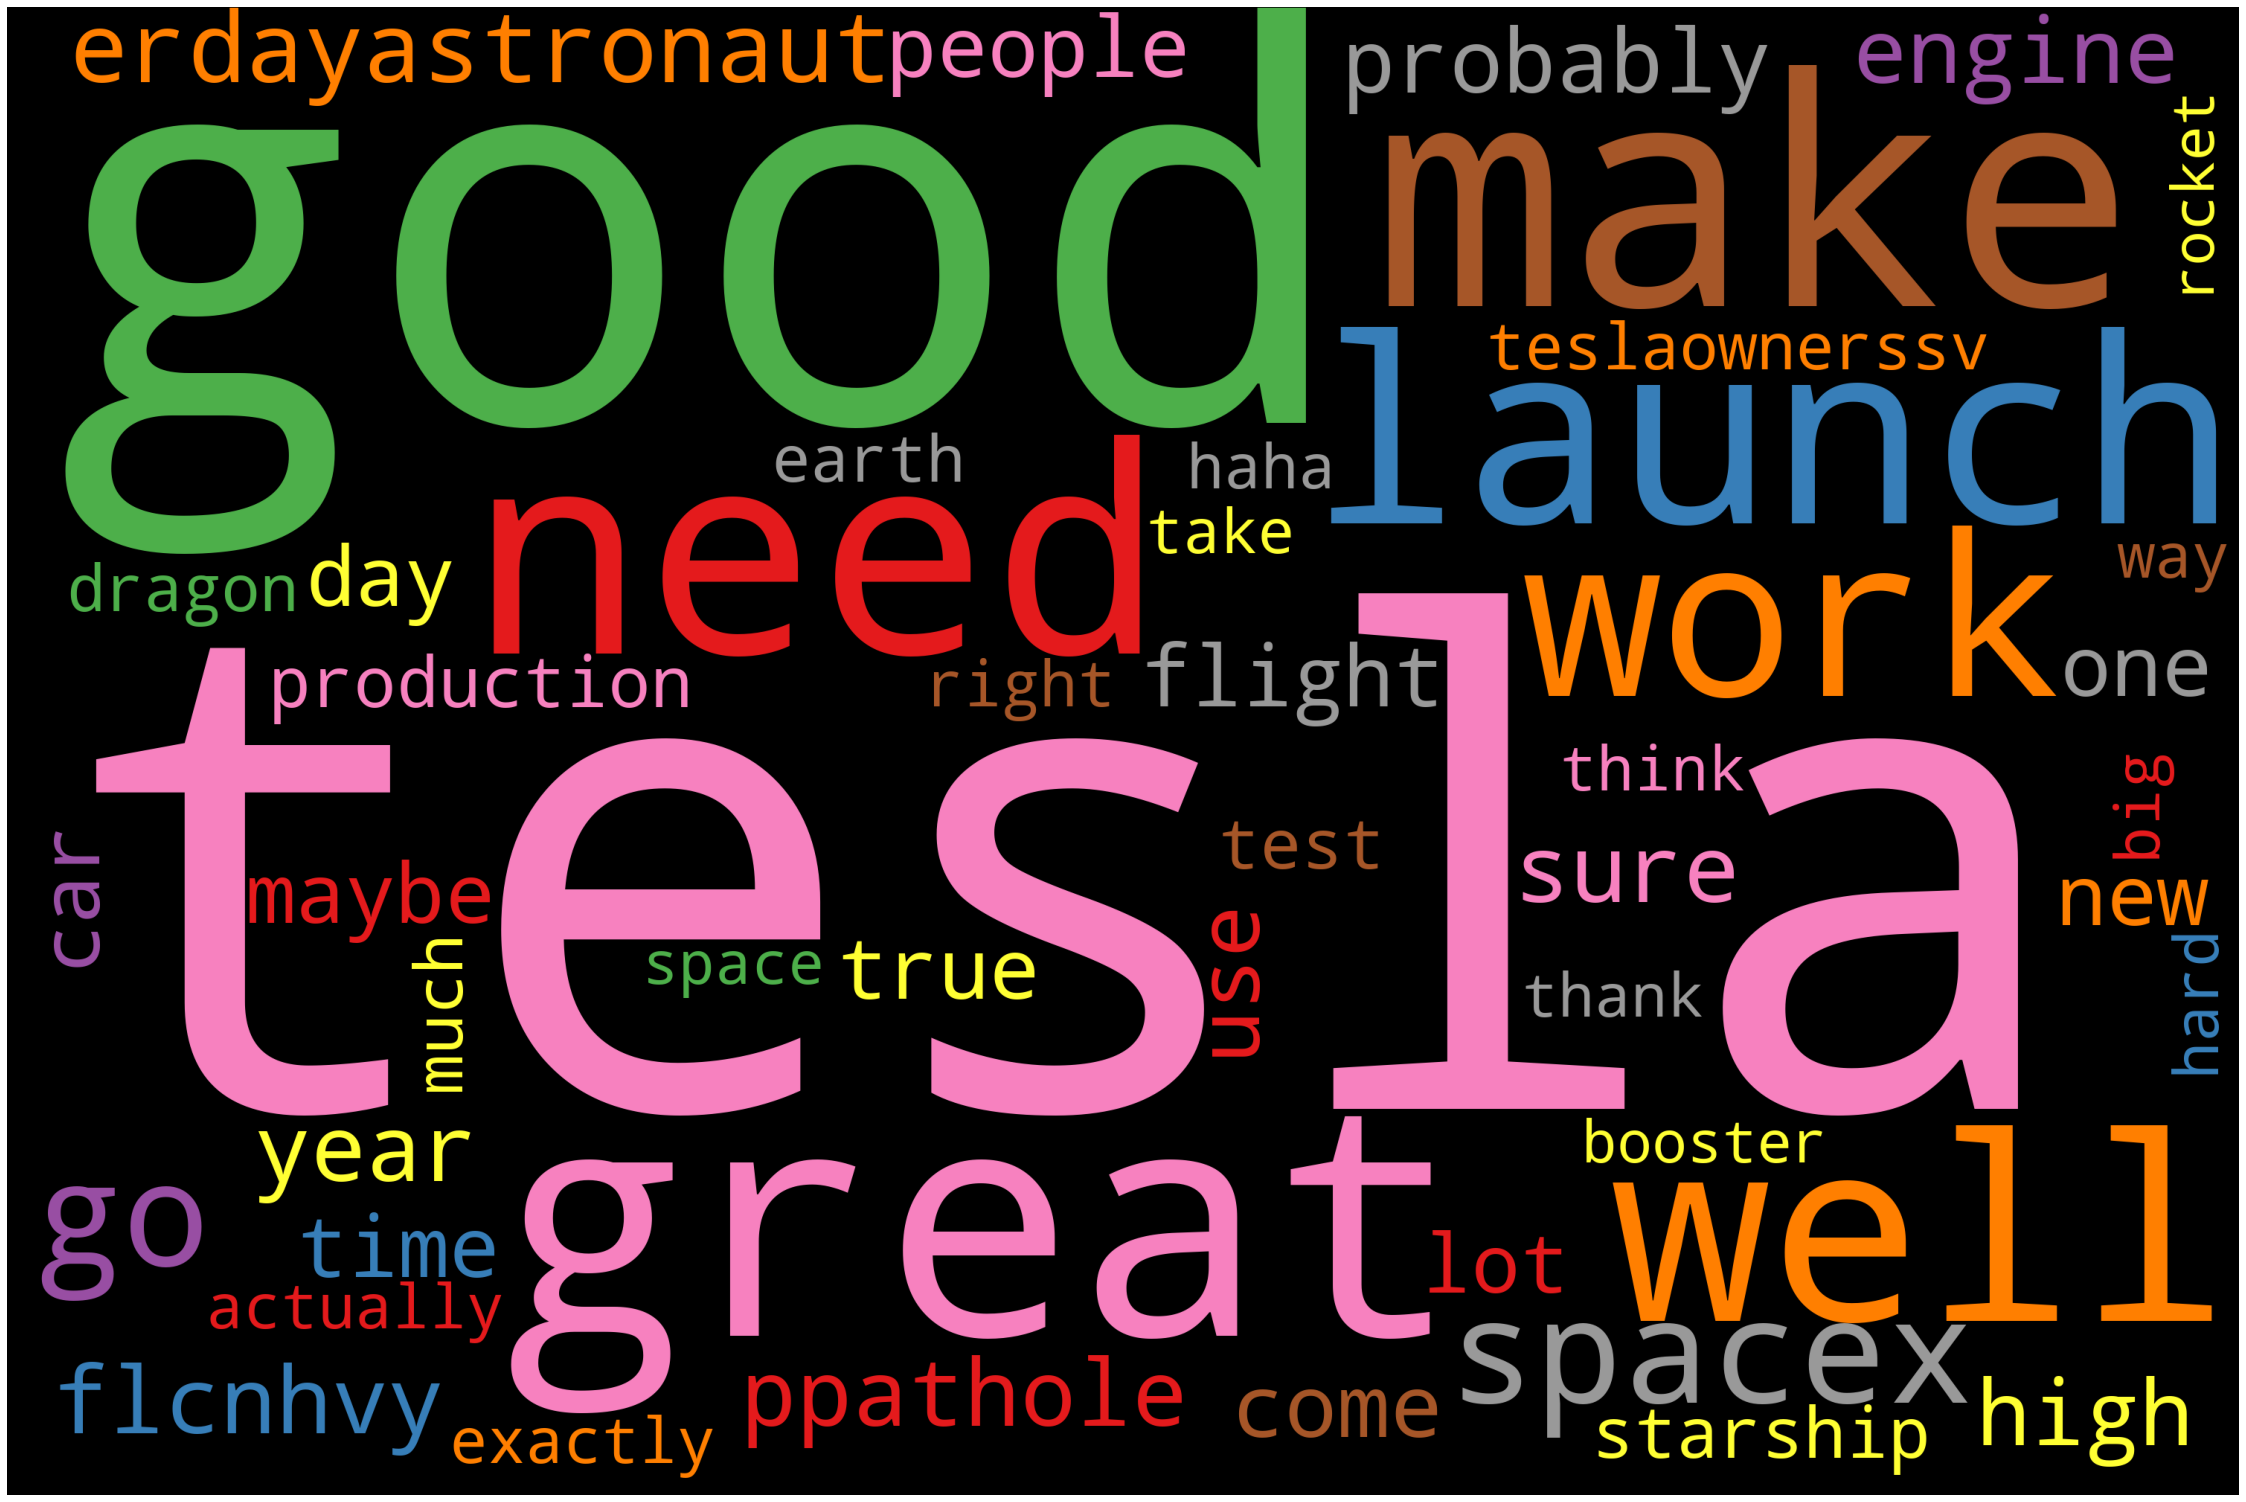

In [144]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [145]:
#emotional or sentimental analysis

# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_md')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [146]:
for token in doc_block[100:200]:
    print(token,token.pos_)


element NOUN
lunar NOUN
gateway NOUN
together ADV
one NUM
mission NOUN
blkmdl3 NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink ADJ
ipo NOUN
rationaletienne NOUN
starlink VERB
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
spacex PRON
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g NOUN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this DET
intend VERB
earth NOUN
may AUX
idea VERB
apply VERB
mars PROPN
cryptoshrikar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m NOUN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla PROPN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that DET
missingback NOUN
work NOUN
go VERB
capybarasurfer NOUN
do AUX
seem VERB
bit ADV
high A

In [147]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])


['erdayastronaut', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'michaelhodapp', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'come', 'joshroomsburg', 'simplicity', 'genius', 'astrogdogg', 'jbuttermost', 'dogecoinrich', 'decade', 'work', 'look', 'note', 'email', 'text', 'yeslesson', 'learnedof', 'earth', 'marstime', 'theonion', 'read', 'kingdom', 'hear', 'name', 'year', 'grimezsz', 'dogecakeyolt', 'kristennetten', 'owenspark', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'redlineshifter', 'u0001f5a4', 'destiny', 'erdayastronaut', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'isp', 'erdayastronaut', 'seem', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'falcon', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', 'deck', 'joshbickett', 'default', 'engine', 'lever', 'arm

In [148]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,make,64
1,launch,56
2,year,47
3,work,44
4,go,41
5,need,41
6,get,37
7,day,37
8,come,35
9,engine,35


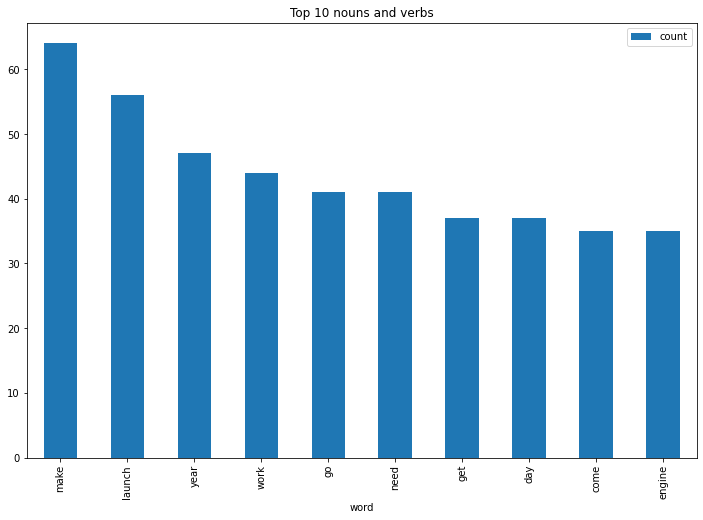

In [149]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

Emotion Mining

Sentiment Analysis

TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining



In [37]:
ps4= pd.read_csv('D:\\Data Science-Ayesha\\Amazon_reviews_on_FIFA 22 (PS4).csv', sep=',' , encoding='UTF-8')
ps4

,rating,review,name
0,1,Why bring out a 22 for PS4 if it was going to ...,FIFA 22 PS4
1,1,"Game is good, but please don't buy it, it caus...",FIFA 22 PS4
2,5,As your wish it depend up on you yes game is a...,FIFA 22 PS4
3,5,Good Buy,FIFA 22 PS4


In [49]:
ps4=[review.strip() for review in ps4.review] # remove both the leading and the trailing characters
ps4=[review for review in ps4 if review] # removes empty strings, because they are considered in Python as False
ps4[0:5]


['Why bring out a 22 for PS4 if it was going to be a copy paste? The developers said that all improvements were on PS5 and they are. PS4 copy is just for someone who hasn’t played 21. Except the updated rosters and jerseys in 22, not one thing is different from 21. Save your money and get Far Cry or Battlefield.',
 "Game is good, but please don't buy it, it causes depression, it will ruin your life, trust me. Thank You.",
 'As your wish it depend up on you yes game is awesome',
 'Good Buy']

In [50]:
ps4_text=' '.join(ps4)
ps4_text

"Why bring out a 22 for PS4 if it was going to be a copy paste? The developers said that all improvements were on PS5 and they are. PS4 copy is just for someone who hasn’t played 21. Except the updated rosters and jerseys in 22, not one thing is different from 21. Save your money and get Far Cry or Battlefield. Game is good, but please don't buy it, it causes depression, it will ruin your life, trust me. Thank You. As your wish it depend up on you yes game is awesome Good Buy"

In [54]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
text_tokens=word_tokenize(ps4_text)
print(text_tokens[0:50])
len(text_tokens)

['Why', 'bring', 'out', 'a', '22', 'for', 'PS4', 'if', 'it', 'was', 'going', 'to', 'be', 'a', 'copy', 'paste', '?', 'The', 'developers', 'said', 'that', 'all', 'improvements', 'were', 'on', 'PS5', 'and', 'they', 'are', '.', 'PS4', 'copy', 'is', 'just', 'for', 'someone', 'who', 'hasn', '’', 't', 'played', '21', '.', 'Except', 'the', 'updated', 'rosters', 'and', 'jerseys', 'in']


[nltk_data] Downloading package punkt to C:\Users\Mohammed
[nltk_data]     Nouman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohammed
[nltk_data]     Nouman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


111

In [55]:
ps4_tokens_text=' '.join(text_tokens)
ps4_tokens_text


"Why bring out a 22 for PS4 if it was going to be a copy paste ? The developers said that all improvements were on PS5 and they are . PS4 copy is just for someone who hasn ’ t played 21 . Except the updated rosters and jerseys in 22 , not one thing is different from 21 . Save your money and get Far Cry or Battlefield . Game is good , but please do n't buy it , it causes depression , it will ruin your life , trust me . Thank You . As your wish it depend up on you yes game is awesome Good Buy"

In [56]:
# Remove Punctuations 
no_punc_text=ps4_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text


'Why bring out a 22 for PS4 if it was going to be a copy paste  The developers said that all improvements were on PS5 and they are  PS4 copy is just for someone who hasn ’ t played 21  Except the updated rosters and jerseys in 22  not one thing is different from 21  Save your money and get Far Cry or Battlefield  Game is good  but please do nt buy it  it causes depression  it will ruin your life  trust me  Thank You  As your wish it depend up on you yes game is awesome Good Buy'

In [57]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text


'Why bring out a 22 for PS4 if it was going to be a copy paste  The developers said that all improvements were on PS5 and they are  PS4 copy is just for someone who hasn ’ t played 21  Except the updated rosters and jerseys in 22  not one thing is different from 21  Save your money and get Far Cry or Battlefield  Game is good  but please do nt buy it  it causes depression  it will ruin your life  trust me  Thank You  As your wish it depend up on you yes game is awesome Good Buy'

In [58]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)


['Why', 'bring', 'out', 'a', '22', 'for', 'PS4', 'if', 'it', 'was', 'going', 'to', 'be', 'a', 'copy', 'paste', 'The', 'developers', 'said', 'that', 'all', 'improvements', 'were', 'on', 'PS5', 'and', 'they', 'are', 'PS4', 'copy', 'is', 'just', 'for', 'someone', 'who', 'hasn', '’', 't', 'played', '21', 'Except', 'the', 'updated', 'rosters', 'and', 'jerseys', 'in', '22', 'not', 'one', 'thing', 'is', 'different', 'from', '21', 'Save', 'your', 'money', 'and', 'get', 'Far', 'Cry', 'or', 'Battlefield', 'Game', 'is', 'good', 'but', 'please', 'do', 'nt', 'buy', 'it', 'it', 'causes', 'depression', 'it', 'will', 'ruin', 'your', 'life', 'trust', 'me', 'Thank', 'You', 'As', 'your', 'wish', 'it', 'depend', 'up', 'on', 'you', 'yes', 'game', 'is', 'awesome', 'Good', 'Buy']


In [59]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Mohammed
[nltk_data]     Nouman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohammed
[nltk_data]     Nouman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)


['Why', 'bring', 'out', 'a', '22', 'for', 'PS4', 'if', 'it', 'was', 'going', 'to', 'be', 'a', 'copy', 'paste', 'The', 'developers', 'said', 'that', 'all', 'improvements', 'were', 'on', 'PS5', 'and', 'they', 'are', 'PS4', 'copy', 'is', 'just', 'for', 'someone', 'who', 'hasn', '’', 't', 'played', '21', 'Except', 'the', 'updated', 'rosters', 'and', 'jerseys', 'in', '22', 'not', 'one', 'thing', 'is', 'different', 'from', '21', 'Save', 'your', 'money', 'and', 'get', 'Far', 'Cry', 'or', 'Battlefield', 'Game', 'is', 'good', 'but', 'please', 'do', 'nt', 'buy', 'it', 'it', 'causes', 'depression', 'it', 'will', 'ruin', 'your', 'life', 'trust', 'me', 'Thank', 'You', 'As', 'your', 'wish', 'it', 'depend', 'up', 'on', 'you', 'yes', 'game', 'is', 'awesome', 'Good', 'Buy']


In [61]:
#token count
len(text_tokens)

99

In [62]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)


['Why', 'bring', '22', 'PS4', 'going', 'copy', 'paste', 'The', 'developers', 'said', 'improvements', 'PS5', 'PS4', 'copy', 'someone', '’', 'played', '21', 'Except', 'updated', 'rosters', 'jerseys', '22', 'one', 'thing', 'different', '21', 'Save', 'money', 'get', 'Far', 'Cry', 'Battlefield', 'Game', 'good', 'please', 'nt', 'buy', 'causes', 'depression', 'ruin', 'life', 'trust', 'Thank', 'You', 'As', 'wish', 'depend', 'yes', 'game', 'awesome', 'Good', 'Buy']


In [65]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[10:20])

['improvements', 'ps5', 'ps4', 'copy', 'someone', '’', 'played', '21', 'except', 'updated']


In [66]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[10:20])

['improv', 'ps5', 'ps4', 'copi', 'someon', '’', 'play', '21', 'except', 'updat']


In [67]:
# Lemmatization
nlp=spacy.load('en_core_web_md')
doc=nlp(' '.join(lower_words))
print(doc)


why bring 22 ps4 going copy paste the developers said improvements ps5 ps4 copy someone ’ played 21 except updated rosters jerseys 22 one thing different 21 save money get far cry battlefield game good please nt buy causes depression ruin life trust thank you as wish depend yes game awesome good buy


In [68]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)


['why', 'bring', '22', 'ps4', 'go', 'copy', 'paste', 'the', 'developer', 'say', 'improvement', 'ps5', 'ps4', 'copy', 'someone', "'", 'play', '21', 'except', 'update', 'roster', 'jersey', '22', 'one', 'thing', 'different', '21', 'save', 'money', 'get', 'far', 'cry', 'battlefield', 'game', 'good', 'please', 'nt', 'buy', 'cause', 'depression', 'ruin', 'life', 'trust', 'thank', 'you', 'as', 'wish', 'depend', 'yes', 'game', 'awesome', 'good', 'buy']


In [69]:
clean_review=' '.join(lemmas)
clean_review

"why bring 22 ps4 go copy paste the developer say improvement ps5 ps4 copy someone ' play 21 except update roster jersey 22 one thing different 21 save money get far cry battlefield game good please nt buy cause depression ruin life trust thank you as wish depend yes game awesome good buy"

In [70]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
ps4cv=cv.fit_transform(lemmas)


In [71]:
print(cv.vocabulary_)

{'why': 41, 'bring': 5, '22': 1, 'ps4': 29, 'go': 18, 'copy': 8, 'paste': 26, 'the': 37, 'developer': 12, 'say': 34, 'improvement': 20, 'ps5': 30, 'someone': 35, 'play': 27, '21': 0, 'except': 14, 'update': 40, 'roster': 31, 'jersey': 21, 'one': 25, 'thing': 38, 'different': 13, 'save': 33, 'money': 23, 'get': 17, 'far': 15, 'cry': 9, 'battlefield': 4, 'game': 16, 'good': 19, 'please': 28, 'nt': 24, 'buy': 6, 'cause': 7, 'depression': 11, 'ruin': 32, 'life': 22, 'trust': 39, 'thank': 36, 'you': 44, 'as': 2, 'wish': 42, 'depend': 10, 'yes': 43, 'awesome': 3}


In [72]:
print(cv.get_feature_names()[10:20])

['depend', 'depression', 'developer', 'different', 'except', 'far', 'game', 'get', 'go', 'good']


In [73]:
print(ps4cv.toarray()[10:20])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0]]


In [74]:
print(ps4cv.toarray().shape)

(53, 45)


In [75]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)


In [76]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['21', '22', 'as', 'awesome', 'battlefield', 'bring', 'buy', 'cause', 'copy', 'cry', 'depend', 'depression', 'developer', 'different', 'except', 'far', 'game', 'get', 'go', 'good', 'improvement', 'jersey', 'life', 'money', 'nt', 'one', 'paste', 'play', 'please', 'ps4', 'ps5', 'roster', 'ruin', 'save', 'say', 'someone', 'thank', 'the', 'thing', 'trust', 'update', 'why', 'wish', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
!pip install wordcloud

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=50)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [79]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS


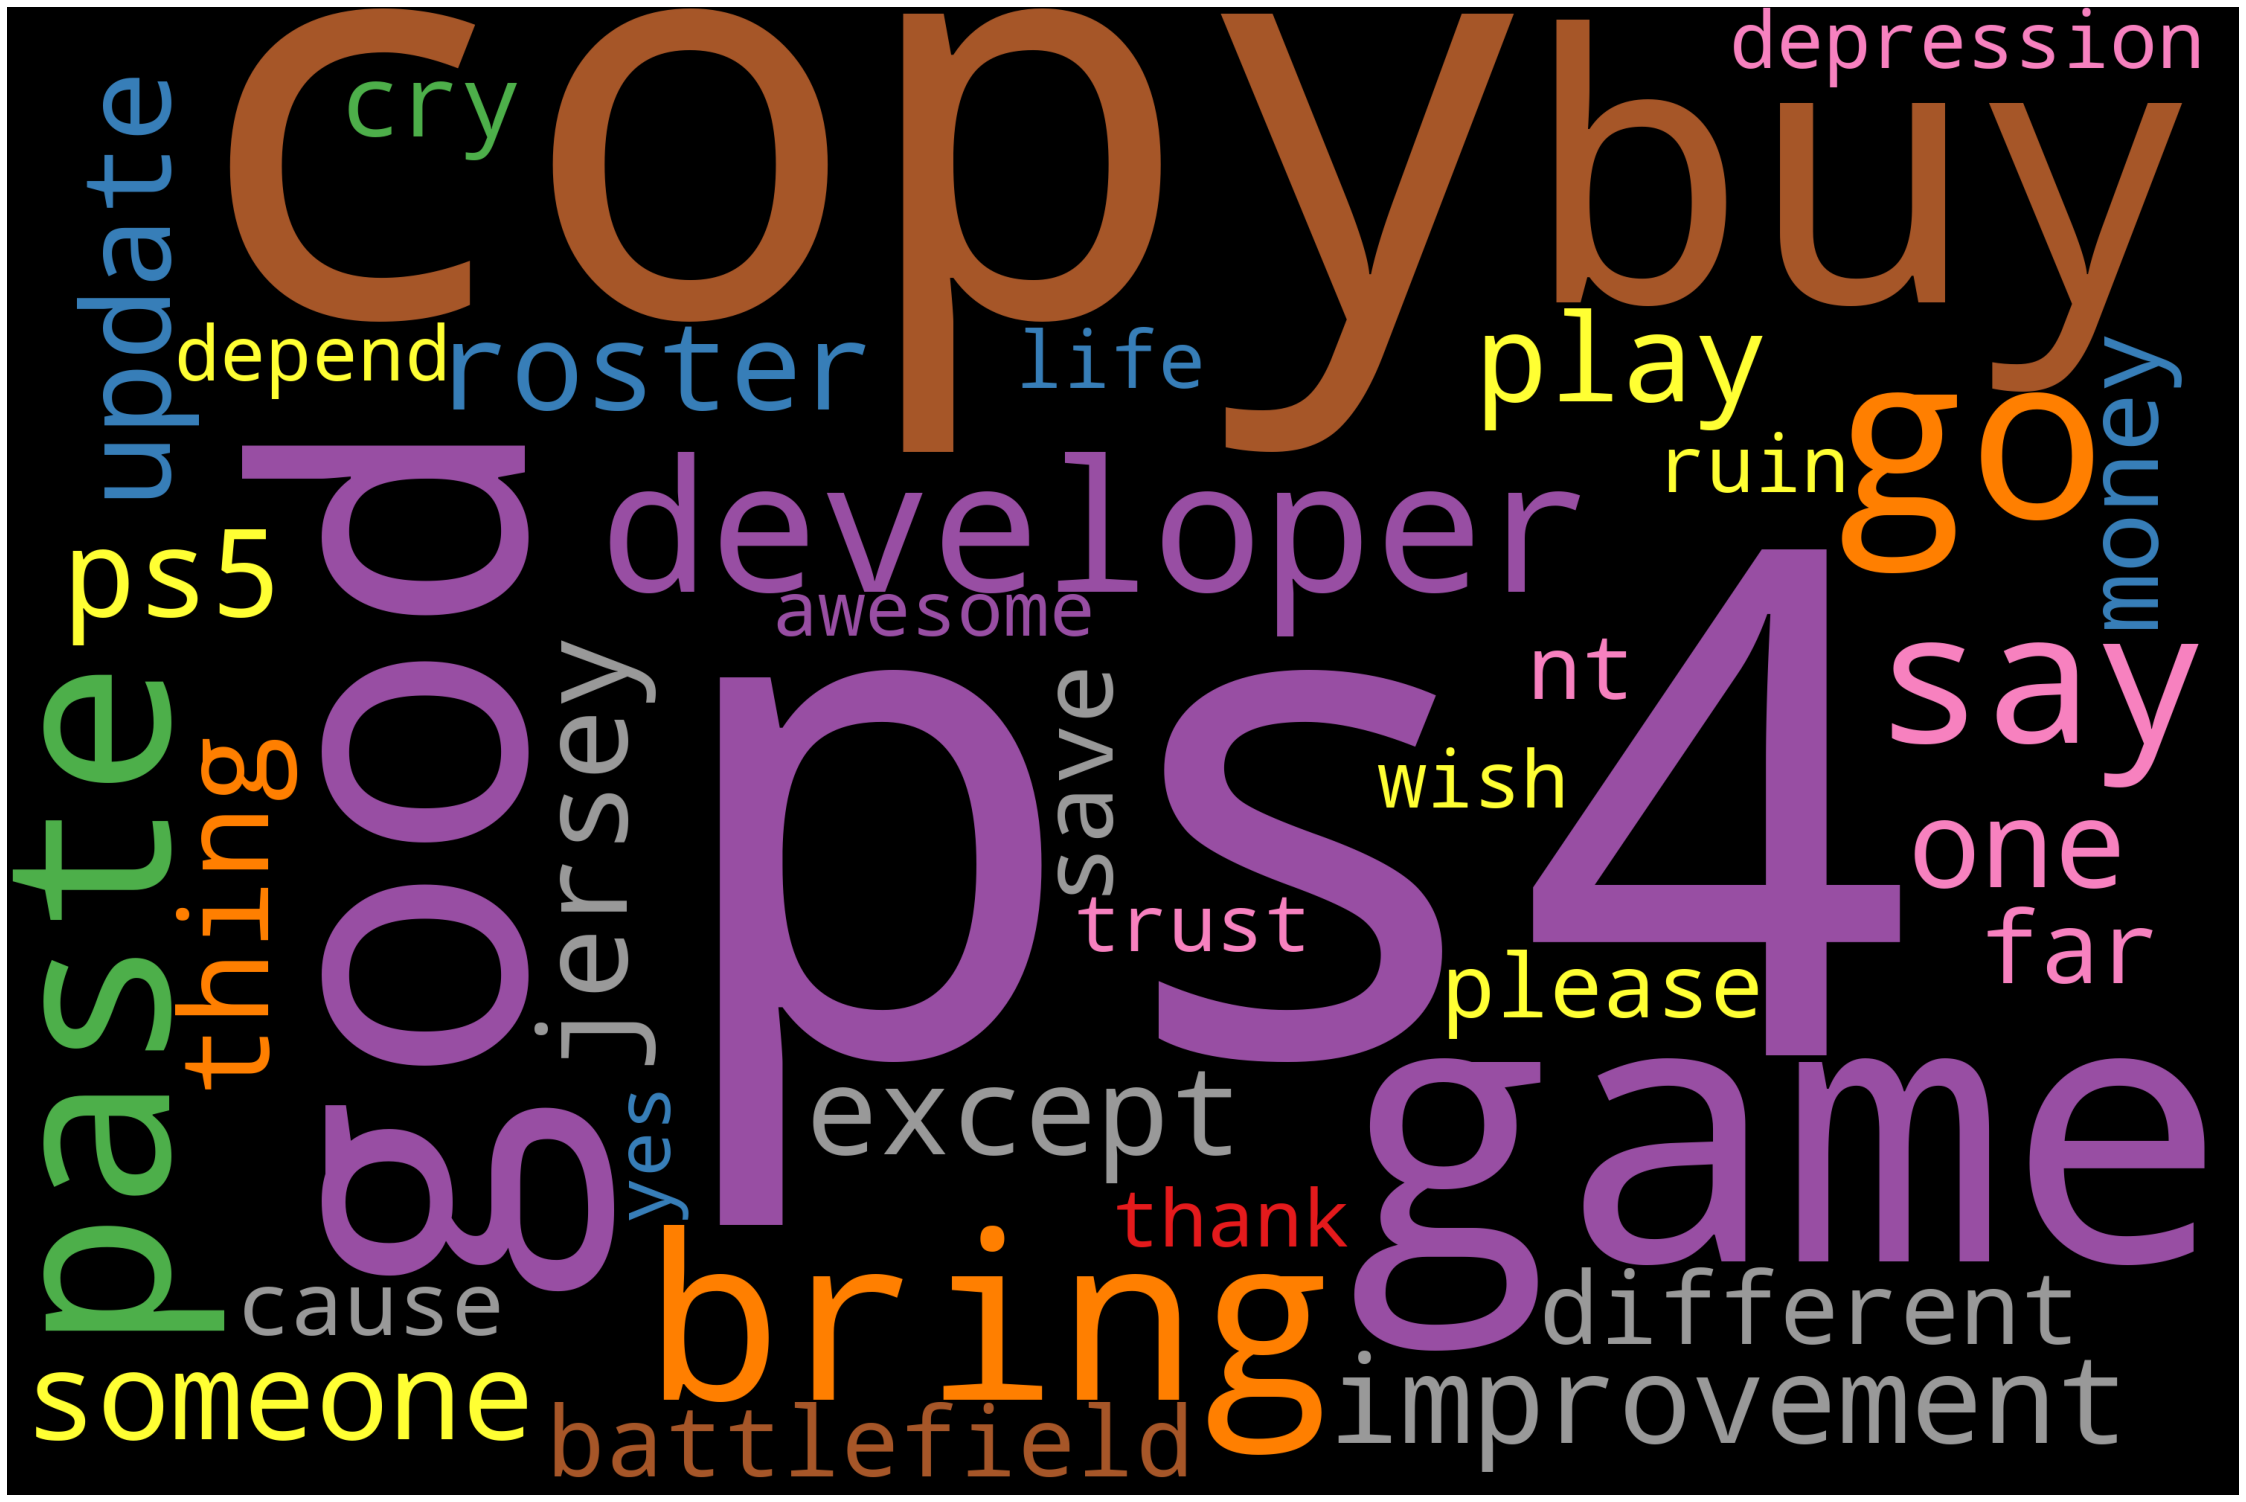

In [81]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_review)
plot_cloud(wordcloud)


In [82]:
#Emotion Mining - Sentiment Analysis
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_md')

one_block=clean_review
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [83]:
for token in doc_block[10:20]:
    print(token,token.pos_)


improvement NOUN
ps5 PROPN
ps4 PROPN
copy VERB
someone PRON
' PUNCT
play VERB
21 NUM
except SCONJ
update PROPN


In [84]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[10:20])

['save', 'money', 'get', 'cry', 'battlefield', 'game', 'buy', 'cause', 'depression', 'ruin']


In [85]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:5] # viewing top ten results


,word,count
0,copy,2
1,game,2
2,buy,2
3,bring,1
4,go,1


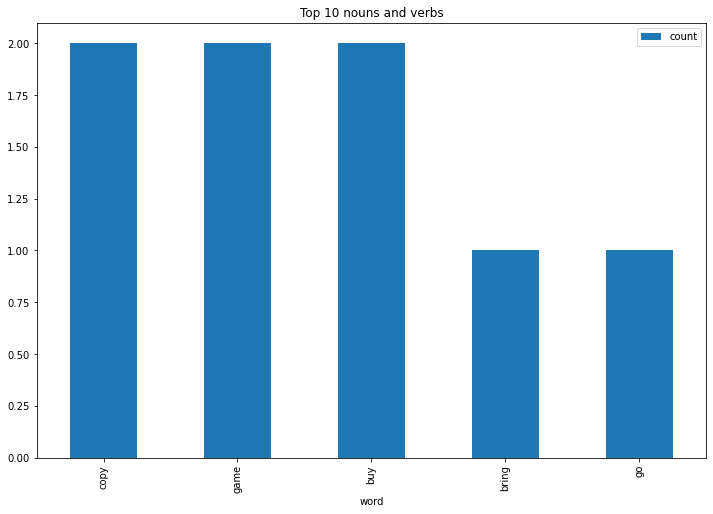

In [86]:
# Visualizing results (Barchart for top 5 nouns + verbs)
wd_df[0:5].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [88]:
#Emotion Mining - Sentiment Analysis¶
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(ps4))
sentences


['Why bring out a 22 for PS4 if it was going to be a copy paste?',
 'The developers said that all improvements were on PS5 and they are.',
 'PS4 copy is just for someone who hasn’t played 21.',
 'Except the updated rosters and jerseys in 22, not one thing is different from 21.',
 'Save your money and get Far Cry or Battlefield.',
 "Game is good, but please don't buy it, it causes depression, it will ruin your life, trust me.",
 'Thank You.',
 'As your wish it depend up on you yes game is awesome Good Buy']

In [89]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Why bring out a 22 for PS4 if it was going to ...
1,The developers said that all improvements were...
2,PS4 copy is just for someone who hasn’t played...
3,"Except the updated rosters and jerseys in 22, ..."
4,Save your money and get Far Cry or Battlefield.
5,"Game is good, but please don't buy it, it caus..."
6,Thank You.
7,As your wish it depend up on you yes game is a...


In [94]:
ps=pd.read_csv('D:\\Data Science-Ayesha\\Amazon_reviews_on_FIFA 22 (PS4).csv')
ps.head()

,rating,review,name
0,1,Why bring out a 22 for PS4 if it was going to ...,FIFA 22 PS4
1,1,"Game is good, but please don't buy it, it caus...",FIFA 22 PS4
2,5,As your wish it depend up on you yes game is a...,FIFA 22 PS4
3,5,Good Buy,FIFA 22 PS4


In [96]:
affinity_scores=ps.set_index('review')['rating'].to_dict()
affinity_scores

{'Why bring out a 22 for PS4 if it was going to be a copy paste? The developers said that all improvements were on PS5 and they are. PS4 copy is just for someone who hasn’t played 21. Except the updated rosters and jerseys in 22, not one thing is different from 21. Save your money and get Far Cry or Battlefield.': 1,
 "Game is good, but please don't buy it, it causes depression, it will ruin your life, trust me. Thank You.": 1,
 'As your wish it depend up on you yes game is awesome': 5,
 'Good Buy': 5}

In [97]:
#Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score


In [108]:
calculate_sentiment(text='good')

0

In [109]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
Name: sentiment_value, dtype: int64

In [110]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']


0    16
1    12
2    10
3    15
4     9
5    18
6     2
7    14
Name: word_count, dtype: int64

In [111]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
0,Why bring out a 22 for PS4 if it was going to ...,0,16
1,The developers said that all improvements were...,0,12
2,PS4 copy is just for someone who hasn’t played...,0,10
3,"Except the updated rosters and jerseys in 22, ...",0,15
4,Save your money and get Far Cry or Battlefield.,0,9
5,"Game is good, but please don't buy it, it caus...",0,18
6,Thank You.,0,2
7,As your wish it depend up on you yes game is a...,0,14


In [112]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    8.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: sentiment_value, dtype: float64

In [113]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Why bring out a 22 for PS4 if it was going to ...,0,16
1,The developers said that all improvements were...,0,12
2,PS4 copy is just for someone who hasn’t played...,0,10
3,"Except the updated rosters and jerseys in 22, ...",0,15
4,Save your money and get Far Cry or Battlefield.,0,9
5,"Game is good, but please don't buy it, it caus...",0,18
6,Thank You.,0,2
7,As your wish it depend up on you yes game is a...,0,14


In [114]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]


,sentence,sentiment_value,word_count


In [115]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df


,sentence,sentiment_value,word_count,index
0,Why bring out a 22 for PS4 if it was going to ...,0,16,0
1,The developers said that all improvements were...,0,12,1
2,PS4 copy is just for someone who hasn’t played...,0,10,2
3,"Except the updated rosters and jerseys in 22, ...",0,15,3
4,Save your money and get Far Cry or Battlefield.,0,9,4
5,"Game is good, but please don't buy it, it caus...",0,18,5
6,Thank You.,0,2,6
7,As your wish it depend up on you yes game is a...,0,14,7


C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Mohammed Nouman\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

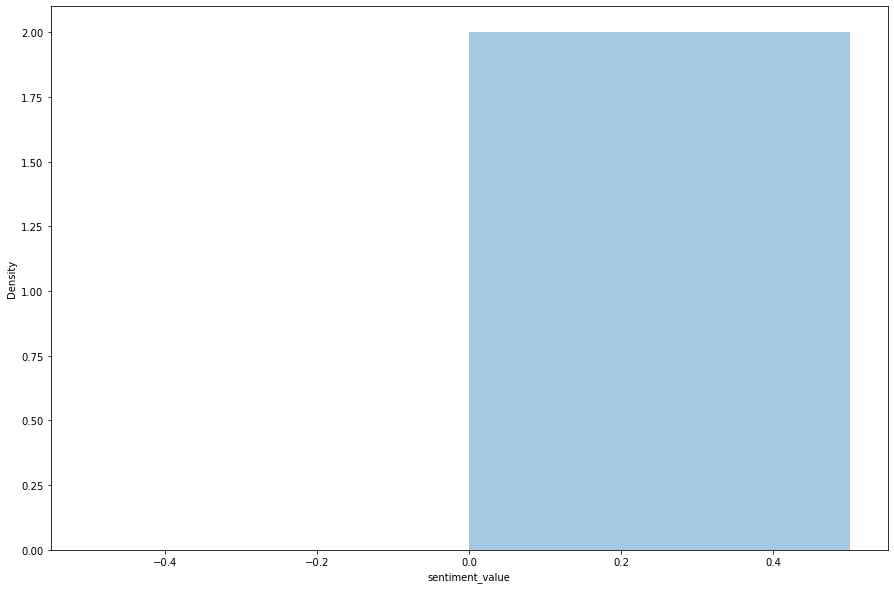

In [116]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

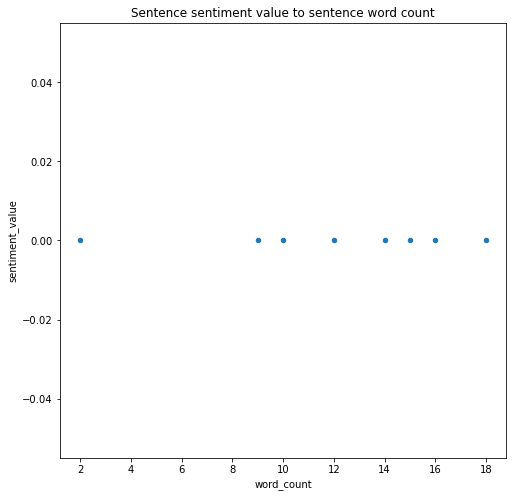

In [118]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')